In [8]:
#                   RHF
#
import psi4  #  import all of psi4
import re as re   #  regular expression library -- used to modify the geometry object by replacing 
import matplotlib.pyplot as plt  
from datascience import *
%matplotlib inline
plt.style.use('fast') 
import os #  a symbol with a number
import numpy as np # numpy library for square roots etc.in gemometry and unit manipulations
psi4.set_memory('2048 MB')           # minimum memory should be 1 GB. Generally  2GB or greater is better
filestringF2 = 'output_diatomicF2.txt'   # file for complete output from Psi4 -- overwritten if it exists. 
psi4.core.set_output_file(filestringF2,False) 
filestring_plotF2 = 'potcurveF2.dat'      # file for output of potential curve for plotting - see below.
                                     # overwritten if it exists.
print("psi4 output is directed to ",filestringF2,"\n")


#


#%%
#                    SPECIFY GEOMETRY PYTHON OBJECT
#
# R_value  =  the internuclear distance in a0
# and must be replaced by a number using the regular expression functions
# in the loop on distances.
#
# NOTE to use UHF guess_mix true option, we must use c1 symmetry
# (no symmetry) just as we must when doing geometry optimizations 
#
# Specifying cartesian coordinates in this example, type of atom
# and its charge are specified by the chemical symbol
# first line is charge and spin multiplicity 1 = singlet 
# 3 = triplet and requires ROHF ('rohf' reference for 'scf' below)
# c1 = C_1 symmetry (no symmetry) OK for RHF and necessary for UHF
# For linear molecules try c2v symmetry, which should be faster and
# will label orbital energies with symmetries in this point group
f2_geometry  =  """
      0 1 
      F  0.0 0.0 0.0 
      F  0.0 0.0 R_value 
    units bohr
    symmetry c1 """

#   print the geometry 
print(f2_geometry)
#
#  parameters for the curve
#
N_RvalsF2 = 50  # when debugging use a small number of R values
RminF2 = 1.0    # use a larger Rmin for F2 in the Chem 210A assignment, Rmin = 1.5 is OK
RmaxF2 = 8.0
drF2 = (RmaxF2-RminF2)/(N_RvalsF2-1)
#
#  psi4 options that do not change with R value
# 
#                               BASIS SET
#  cc-pVDZ is a small correlation consistent Dunning basis - good for first calculation.
#  (Sometimes won't be  good enough for Chem 210A final answers
#  but for UHF larger basis sets sometimes harder to converge to 
#  spin symmetry broken result. Options given here work for double zeta and 
#  triple zeta correlation consistent basis sets for H2)
#
#psi4.set_options({'basis': 'cc-pVTZ'}) 
#                        METHOD OR REFERENCE METHOD 
#   Method, and/or  reference for CI or MP2 calculations is set here
  # change "uhf" to "rhf" for restricted HF
#
#                          SCF INITIAL GUESS
#  initial guess options for SCF, very important for UHF and sometimes ROHF
#
#psi4.set_options({'guess': 'read'})  #  can be used to follow a solution as R changes
#                                     #  if we run an initial point before the loop on R
#
#   guess_mix gives a guess that mixes alpha and beta spin orbitals to allow 
#   UHF to find the spin broken solution(s) for closed shells, like F2
#psi4.set_options({"guess_mix": 'true'})  # turn on only for UHF where it is essential
#                                          to break the spin symmetry and find the lower 
#
psi4.set_options({'basis': 'cc-pVTZ'})
psi4.set_options({"reference": "rhf"})
psi4.set_options({'guess_mix': 'true'})
psi4.set_options({'guess': 'core'}) # diagonalize core Hamiltonian for guess
psi4.set_options({"MAXITER": 500})
#energy UHF solution instead of the HF solution
#
#   guess: core good for closed shell restricted Hartree-Fock 
#   should replace guess:  sad below for restricted Hartree-Fock 
#psi4.set_options({'guess': 'core'})    # diagonalize core (nuclear attraction only) Hamiltonian  guess
#
#  some other guess options that help converge UHF calculations 
#psi4.set_options({'guess': 'sad'})    # superposition of atomic densities (SAD) guess
# New version of Psi4 in 2019 would not converge to UHF solution solution with SAD guess
# To get Psi4 to give the UHF solution for this example use  the Wolfsberg-Helmholgz Huckel first guess
#psi4.set_options({'guess': 'gwh'})    # generalized Wolfsberg-Helmholz Huckel-like guess
#                                       works for ordinary restricted HF (RHF) as well
#psi4.set_options({"SOSCF": 'true'})   #  second order scf is quadratically convergent algorithm -- occasionally useful
#psi4.set_options({"MAXITER": 500})    # If near 500 iterations are necessary, calculation is on the edge of failure
#
#  arrays for the R values and energies
#
RvalsF2=[]
Calculated_EnergiesF2=[]
#
#%%
# LOOP over R values 
#
for n in range(N_RvalsF2):
    RF2 = RminF2 + n*drF2
#
#psi4.set_options({'guess': 'read'})  #  can be used to follow a solution as R changes
#                                     #  if we put an if statement here to use this option
#                                     #  for n > 0, after first starting orbitals are defined
#
# The following command substitutes a string made from the value of the
# variable R for the the string "R_value" in the python object h2_geometry
# to make a new object h2_geo_R .  It can be applied several times
# in succession, renaming the result each time, to replace several 
# strings to create a new geometry object
#
    f2_geo_R = re.sub("R_value",str(RF2),f2_geometry)
#
#    print(h2_geo_R)  # print current geometry -- uncomment for debugging
#
#  method is specified here 'scf' assumes a reference to have been set
#  rhf rohf uhf for example
#  'mp2'  also requires a reference (like rhf) as does 'cisd'
#
    finalenergy=psi4.energy('scf',molecule=psi4.geometry(f2_geo_R) )
#    print("R = ",R,"   psi4.energy   ", finalenergy)
    RvalsF2.append(RF2)
    Calculated_EnergiesF2.append(finalenergy)
#
#%%
#                   MAKE OUTPUT FILE FOR PLOTTING
#  at the end of the for loop both print and make a file
#  containing the scf energies
#
f = open(filestring_plotF2,'w')  # rename this file for the case at hand
for n in range(N_RvalsF2):
    print(RvalsF2[n],"   ",Calculated_EnergiesF2[n])
    print(RvalsF2[n],"   ",Calculated_EnergiesF2[n],file=f)
#

psi4 output is directed to  output_diatomicF2.txt 


      0 1 
      F  0.0 0.0 0.0 
      F  0.0 0.0 R_value 
    units bohr
    symmetry c1 
1.0     -192.14894887241005
1.1428571428571428     -194.7624876331727
1.2857142857142856     -196.3362059881735
1.4285714285714286     -197.29924359490792
1.5714285714285714     -197.89360092135456
1.7142857142857142     -198.26064854862747
1.8571428571428572     -198.48553066500392
2.0     -198.62058336232516
2.142857142857143     -198.69830043587234
2.2857142857142856     -198.73904194607408
2.4285714285714284     -198.75578461499995
2.571428571428571     -198.7570083195788
2.7142857142857144     -198.74838471656435
2.8571428571428568     -198.73374825546753
3.0     -198.71568762773722
3.142857142857143     -198.69594231499036
3.2857142857142856     -198.6756731142819
3.4285714285714284     -198.65563833173172
3.571428571428571     -198.63631011609422
3.714285714285714     -198.61795969802512
3.8571428571428568     -198.60072360773478
4.0    

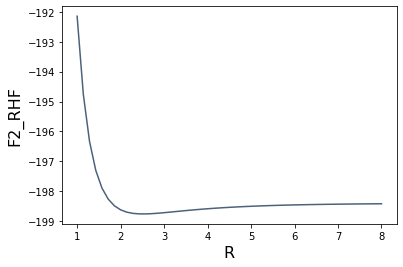

In [9]:
Problem3 = Table().with_columns("R",RvalsF2,"F2_RHF",Calculated_EnergiesF2)
Problem3.plot(0)

In [2]:
#exit()

In [10]:
#                   UHF
#
import psi4  #  import all of psi4
import re as re   #  regular expression library -- used to modify the geometry object by replacing 
import matplotlib.pyplot as plt  
from datascience import *
%matplotlib inline
plt.style.use('fast') 
import os #  a symbol with a number
import numpy as np # numpy library for square roots etc.in gemometry and unit manipulations
psi4.set_memory('2048 MB')           # minimum memory should be 1 GB. Generally  2GB or greater is better
filestringF2UHF = 'output_diatomicF2UHF.txt'   # file for complete output from Psi4 -- overwritten if it exists. 
psi4.core.set_output_file(filestringF2UHF,False) 
filestring_plotF2UHF = 'potcurveF2UHF.dat'      # file for output of potential curve for plotting - see below.
                                     # overwritten if it exists.
print("psi4 output is directed to ",filestringF2UHF,"\n")


#


#%%
#                    SPECIFY GEOMETRY PYTHON OBJECT
#
# R_value  =  the internuclear distance in a0
# and must be replaced by a number using the regular expression functions
# in the loop on distances.
#
# NOTE to use UHF guess_mix true option, we must use c1 symmetry
# (no symmetry) just as we must when doing geometry optimizations 
#
# Specifying cartesian coordinates in this example, type of atom
# and its charge are specified by the chemical symbol
# first line is charge and spin multiplicity 1 = singlet 
# 3 = triplet and requires ROHF ('rohf' reference for 'scf' below)
# c1 = C_1 symmetry (no symmetry) OK for RHF and necessary for UHF
# For linear molecules try c2v symmetry, which should be faster and
# will label orbital energies with symmetries in this point group
f2_geometry  =  """
      0 1 
      F  0.0 0.0 0.0 
      F  0.0 0.0 R_value 
    units bohr
    symmetry c1 """

#   print the geometry 
print(f2_geometry)
#
#  parameters for the curve
#
N_RvalsF2UHF = 50  # when debugging use a small number of R values
RminF2UHF = 1.0    # use a larger Rmin for F2 in the Chem 210A assignment, Rmin = 1.5 is OK
RmaxF2UHF = 8.0
drF2UHF = (RmaxF2UHF-RminF2UHF)/(N_RvalsF2UHF-1)
#
#  psi4 options that do not change with R value
# 
#                               BASIS SET
#  cc-pVDZ is a small correlation consistent Dunning basis - good for first calculation.
#  (Sometimes won't be  good enough for Chem 210A final answers
#  but for UHF larger basis sets sometimes harder to converge to 
#  spin symmetry broken result. Options given here work for double zeta and 
#  triple zeta correlation consistent basis sets for H2)
#
psi4.set_options({'basis': 'cc-pVQZ'})
psi4.set_options({"reference": "uhf"})
psi4.set_options({'guess_mix': 'true'})
psi4.set_options({'guess': 'core'}) # diagonalize core Hamiltonian for guess
psi4.set_options({"MAXITER": 500})
#                          SCF INITIAL GUESS
#  initial guess options for SCF, very important for UHF and sometimes ROHF
#
#psi4.set_options({'guess': 'read'})  #  can be used to follow a solution as R changes
#                                     #  if we run an initial point before the loop on R
#
#   guess_mix gives a guess that mixes alpha and beta spin orbitals to allow 
#   UHF to find the spin broken solution(s) for closed shells, like F2
#psi4.set_options({"guess_mix": 'true'})  # turn on only for UHF where it is essential
#                                          to break the spin symmetry and find the lower 
#                                          energy UHF solution instead of the HF solution
#
#   guess: core good for closed shell restricted Hartree-Fock 
#   should replace guess:  sad below for restricted Hartree-Fock 
#psi4.set_options({'guess': 'core'})    # diagonalize core (nuclear attraction only) Hamiltonian  guess
#
#  some other guess options that help converge UHF calculations 
#psi4.set_options({'guess': 'sad'})    # superposition of atomic densities (SAD) guess
# New version of Psi4 in 2019 would not converge to UHF solution solution with SAD guess
# To get Psi4 to give the UHF solution for this example use  the Wolfsberg-Helmholgz Huckel first guess
##psi4.set_options({'guess': 'gwh'})    # generalized Wolfsberg-Helmholz Huckel-like guess
#                                       works for ordinary restricted HF (RHF) as well
#psi4.set_options({"SOSCF": 'true'})   #  second order scf is quadratically convergent algorithm -- occasionally useful
#psi4.set_options({"MAXITER": 500})    # If near 500 iterations are necessary, calculation is on the edge of failure
#
#  arrays for the R values and energies
#
RvalsF2UHF=[]
Calculated_EnergiesF2UHF=[]
#
#%%
# LOOP over R values 
#
for n in range(N_RvalsF2UHF):
    RF2UHF = RminF2UHF + n*drF2UHF
#
#psi4.set_options({'guess': 'read'})  #  can be used to follow a solution as R changes
#                                     #  if we put an if statement here to use this option
#                                     #  for n > 0, after first starting orbitals are defined
#
# The following command substitutes a string made from the value of the
# variable R for the the string "R_value" in the python object h2_geometry
# to make a new object h2_geo_R .  It can be applied several times
# in succession, renaming the result each time, to replace several 
# strings to create a new geometry object
#
    f2_geo_R = re.sub("R_value",str(RF2UHF),f2_geometry)
#
#    print(h2_geo_R)  # print current geometry -- uncomment for debugging
#
#  method is specified here 'scf' assumes a reference to have been set
#  rhf rohf uhf for example
#  'mp2'  also requires a reference (like rhf) as does 'cisd'
#
    finalenergy=psi4.energy('scf',molecule=psi4.geometry(f2_geo_R) )
#    print("R = ",R,"   psi4.energy   ", finalenergy)
    RvalsF2UHF.append(RF2UHF)
    Calculated_EnergiesF2UHF.append(finalenergy)
#
#%%
#                   MAKE OUTPUT FILE FOR PLOTTING
#  at the end of the for loop both print and make a file
#  containing the scf energies
#
f = open(filestring_plotF2UHF,'w')  # rename this file for the case at hand
for n in range(N_RvalsF2UHF):
    print(RvalsF2UHF[n],"   ",Calculated_EnergiesF2UHF[n])
    print(RvalsF2UHF[n],"   ",Calculated_EnergiesF2UHF[n],file=f)
#

psi4 output is directed to  output_diatomicF2UHF.txt 


      0 1 
      F  0.0 0.0 0.0 
      F  0.0 0.0 R_value 
    units bohr
    symmetry c1 
1.0     -192.25078029763824
1.1428571428571428     -194.82150669406997
1.2857142857142856     -196.37510811232818
1.4285714285714286     -197.32833899101055
1.5714285714285714     -197.91760225880572
1.7142857142857142     -198.2819147110663
1.8571428571428572     -198.50522970189581
2.0     -198.63922166646415
2.142857142857143     -198.71610292663394
2.2857142857142856     -198.75617929696622
2.4285714285714284     -198.7724480083705
2.571428571428571     -198.7746921902366
2.7142857142857144     -198.78043930206886
2.8571428571428568     -198.78888568213077
3.0     -198.79714482316288
3.142857142857143     -198.80419279965975
3.2857142857142856     -198.8098277200486
3.4285714285714284     -198.8141746767421
3.571428571428571     -198.81745889287143
3.714285714285714     -198.8199099384272
3.8571428571428568     -198.8217274093794
4.0    

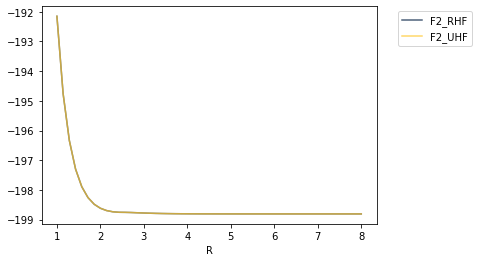

In [9]:
Problem3 = Table().with_columns("R",RvalsF2UHF,"F2_RHF",Calculated_EnergiesF2UHF,"F2_UHF",Calculated_EnergiesF2UHF)
Problem3.plot(0)

In [13]:
exit()